# Importando as bibliotecas

In [ ]:
!pip install paretochart 

  Created wheel for paretochart: filename=paretochart-1.0-py3-none-any.whl size=6025 sha256=4f47cfc5ab9f73511336ffcada26219a5dd71c20610e89bcece15de89f6df1f4
  Stored in directory: /Users/usuario/Library/Caches/pip/wheels/5a/98/73/8ebfaf685fe317518c75f005e3898f81a62ed55de04feadd2a
Successfully built paretochart


In [96]:
# Para importação de dados e tratamento de dataframes:
import pandas as pd

# Para tratamento de arrays:
import numpy as np

# Para visualização de dados:
import seaborn as sns
import matplotlib.pyplot as plt

# Para criação do Pareto:
from matplotlib.ticker import PercentFormatter

# Para estimativa da tendência central dos barplots:
from numpy import median

In [4]:
print(f"""A versão de Pandas utilizada foi {pd.__version__}
A versão de Numpy utilizada foi {np.__version__}
A versão de Seaborn utilizada foi {sns.__version__}""")

A versão de Pandas utilizada foi 1.2.0
A versão de Numpy utilizada foi 1.19.5
A versão de Seaborn utilizada foi 0.11.1


# Importando os arquivos

In [97]:
df = pd.read_excel('Base_para_exame.xlsx')

In [6]:
df.head(5)

,Número,Empresa,Cliente,Grupo designado,TIME,Aberto,Encerrado,Prioridade,Estado,Motivo para estar em espera,Foi violado,TIPO REGISTRO,ID_INCIDENTE,CATEG,ACAO
0,INC20210276454,EMPRESA 34,CLIENTE 38,TVT - EXTENDED SUPPORT TEAM MIDDLEWARE,MIDDLEWARE,2021-03-21 20:26:18,2021-03-21 23:59:08,1 - Crítico,Cancelado,NaN,0.0,INCIDENTES,NaN,Outros,SEM ACAO
1,INC20210276129,EMPRESA 11,CLIENTE 37,TVT - EXTENDED SUPPORT TEAM SAP BASIS,SAP BASIS,2021-03-21 16:05:05,2021-03-21 23:49:59,1 - Crítico,Cancelado,NaN,0.0,INCIDENTES,NaN,Outros,RESET DE SERVICO
2,INC20210275797,EMPRESA 5,CLIENTE 35,TVT - EXTENDED SUPPORT TEAM WINDOWS,WINDOWS,2021-03-21 11:45:07,2021-03-21 14:46:32,1 - Crítico,Cancelado,NaN,0.0,INCIDENTES,NaN,Outros,RESET DE SERVIDOR
3,INC20210275455,EMPRESA 36,CLIENTE 35,TVT - EXTENDED SUPPORT TEAM WINDOWS,WINDOWS,2021-03-21 08:36:21,2021-03-21 09:08:00,4 - Baixo,Cancelado,NaN,0.0,INCIDENTES,NaN,Outros,CHAMADO NO FORNECEDOR
4,INC20210275046,EMPRESA 27,CLIENTE 35,TVT - EXTENDED SUPPORT TEAM WINDOWS,WINDOWS,2021-03-21 05:35:37,2021-03-21 22:55:22,2 - Alto,Cancelado,NaN,0.0,INCIDENTES,NaN,Outros,LIMPEZA DE DISCO


# Limpeza de dados
A partir do método info() abaixo, ficam evidentes alguns desvios.

## Identificação de nulos / más classificações

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182794 entries, 0 to 182793
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Número                       121396 non-null  object        
 1   Empresa                      121396 non-null  object        
 2   Cliente                      121396 non-null  object        
 3   Grupo designado              121396 non-null  object        
 4   TIME                         121396 non-null  object        
 5   Aberto                       121396 non-null  datetime64[ns]
 6   Encerrado                    121396 non-null  datetime64[ns]
 7   Prioridade                   121396 non-null  object        
 8   Estado                       121396 non-null  object        
 9   Motivo para estar em espera  69 non-null      object        
 10  Foi violado                  121396 non-null  float64       
 11  TIPO REGISTRO             

In [8]:
#Graficando a presença de nulos:
#sns.set({'figure.figsize':(20,20)})
#sns.heatmap(df.isnull(),cbar=False)

Checando os nomes das colunas:

In [9]:
df.columns

Index(['Número', 'Empresa', 'Cliente', 'Grupo designado', 'TIME', 'Aberto',
       'Encerrado', 'Prioridade', 'Estado', 'Motivo para estar em espera',
       'Foi violado', 'TIPO REGISTRO', 'ID_INCIDENTE', 'CATEG', 'ACAO'],
      dtype='object')

## Tratamentos
Para futuras análises, é importante termos em mente quais colunas possuem valores nulos. Se necessário, realizar o tratamento adequado.

1. Linhas duplicadas

2. Linhas completas com nulos do tipo NaN e NaT

3. Também nota-se que as colunas estão com espaços entre as palavras e misturam lower + UPPER CASE, o que pode dificultar a chamada das variáveis mais adiante.

4. As seguintes colunas possuíam nulos:
- Motivo para estar em espera
- ID_INCIDENTE
- CATEG

5. Tipos de dados incoerentes
- *Foi violado* como float64 quando deveria ser boolean

### Removendo duplicados e também as linhas onde os dados são todos nulos (NaN e/ou NaT).

In [99]:
df = df.drop_duplicates().dropna(axis=0, how='all')

### Removendo espaços nas laterais, transformando em lower case e substituindo espaços nos meios por underline.

In [100]:
df.columns= df.columns.str.strip().str.lower().str.replace(' ','_')

### Variável com nulos: *Motivo para estar em espera*
Essa coluna só possui 69 dados, os quais se concentram em Aguardando Resolução do Problema. Parecem ser relativo a WIP (work in progress).

In [101]:
df['motivo_para_estar_em_espera'].value_counts()

Aguardando Resolução do Problema    50
Aguardando Fornecedor               12
Aguardando Solicitante               3
Aguardando Evidência                 2
Aguardando Fornecedor Cliente        2
Name: motivo_para_estar_em_espera, dtype: int64

In [102]:
df[~df['motivo_para_estar_em_espera'].isna()]

,número,empresa,cliente,grupo_designado,time,aberto,encerrado,prioridade,estado,motivo_para_estar_em_espera,foi_violado,tipo_registro,id_incidente,categ,acao
7013,INC20210244416,EMPRESA 8,CLIENTE 31,TVT - DATA PROTECTION OPERATION,BACKUP,2021-03-12 17:32:43,2021-03-15 19:03:14,1 - Crítico,Encerrado,Aguardando Resolução do Problema,False,INCIDENTES,NaN,INDISPONIBILIDADE,APLICACAO DE PATCH
7014,INC20210244415,EMPRESA 18,CLIENTE 31,TVT - DATA PROTECTION OPERATION,BACKUP,2021-03-12 17:32:39,2021-03-15 19:13:44,1 - Crítico,Encerrado,Aguardando Resolução do Problema,False,INCIDENTES,NaN,INDISPONIBILIDADE,QUERY DB
7015,INC20210244414,EMPRESA 8,CLIENTE 31,TVT - DATA PROTECTION OPERATION,BACKUP,2021-03-12 17:32:34,2021-03-15 19:02:45,1 - Crítico,Encerrado,Aguardando Resolução do Problema,False,INCIDENTES,NaN,OCUPACAO DE ESPACO,REFRESH IIS
7016,INC20210244412,EMPRESA 11,CLIENTE 31,TVT - DATA PROTECTION OPERATION,BACKUP,2021-03-12 17:32:29,2021-03-15 19:07:44,1 - Crítico,Encerrado,Aguardando Resolução do Problema,False,INCIDENTES,NaN,OCUPACAO DE ESPACO,SEM ACAO
7017,INC20210244411,EMPRESA 8,CLIENTE 31,TVT - DATA PROTECTION OPERATION,BACKUP,2021-03-12 17:32:25,2021-03-15 19:02:59,1 - Crítico,Encerrado,Aguardando Resolução do Problema,False,INCIDENTES,NaN,INDISPONIBILIDADE,RESET DE SERVICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117190,601CDD7A2B1D35276AF6EB73,EMPRESA 15,CLIENTE 21,TVT - DPS - ARCHIVE,BACKUP,2021-03-12 04:44:13,2021-03-15 19:11:27,2 - Alto,Encerrado,Aguardando Resolução do Problema,True,EVENTOS,[],OCUPACAO DE ESPACO,APLICACAO DE PATCH
118801,601AB2110A2B31139B5DB247,EMPRESA 15,CLIENTE 45,TVT - DPS - ARCHIVE,BACKUP,2021-03-12 04:42:22,2021-03-15 19:10:39,2 - Alto,Encerrado,Aguardando Resolução do Problema,False,EVENTOS,INC20210107324,Outros,SEM ACAO
119326,6019C0BCFEF77542CA7DD71C,EMPRESA 16,CLIENTE 46,TVT - DATA PROTECTION OPERATION,BACKUP,2021-03-12 17:02:06,2021-03-15 19:10:13,1 - Crítico,Encerrado,Aguardando Resolução do Problema,False,EVENTOS,INC20210105222,Outros,CHAMADO NO FORNECEDOR
119475,60199DE6A95E4B116860D77B,EMPRESA 4,CLIENTE 10,TVT - DATA PROTECTION OPERATION,BACKUP,2021-03-12 07:02:16,2021-03-15 19:03:47,1 - Crítico,Encerrado,Aguardando Resolução do Problema,False,EVENTOS,[],PERFORMANCE,APLICACAO DE PATCH


O mais sensato nesse momento seria remover essas colunas do DataFrame.

In [103]:
df = df.drop(columns='motivo_para_estar_em_espera')

### Variável com nulos: *ID_INCIDENTE*
Essa coluna possui por volta de 29000 dados. Vamos entender se há alguma correlação da falta de dados com relação às outras features.

A partir do value_counts() observa-se:
- O mesmo valor de *id_incidente* aparece mais de uma vez no DataFrame.
- Entradas com listas vazias são a maior proporção no dataset.

In [104]:
df['id_incidente'].value_counts()

[]                11586
INC20210175514      300
INC20210175754      300
INC20210175745      300
INC20210175482      300
                  ...  
INC20210114228        1
INC20210154936        1
INC20210108888        1
INC20210149682        1
INC20210129935        1
Name: id_incidente, Length: 5621, dtype: int64

Todos os registros *id_incidente* == "[]" parecem ser quando o *TIPO REGISTRO* == "EVENTOS".

In [105]:
df[df['id_incidente']=='[]']['tipo_registro'].value_counts()

EVENTOS    11586
Name: tipo_registro, dtype: int64

Mas nem todos *tipo_registro* == "EVENTOS" apresentam esse comportamento, sendo apenas metade.

In [106]:
df['tipo_registro'].value_counts()

INCIDENTES    91397
EVENTOS       29999
Name: tipo_registro, dtype: int64

Vamos tentar encontrar uma justificativa para que os mesmos estejam faltando.

#### Relação com outras colunas

- O *id_incidente* parece se referir a *categ* de "BANCO DE DADOS".

In [11]:
df[df['id_incidente']=='INC20210175489']['categ'].value_counts()

BANCO DE DADOS    300
Name: categ, dtype: int64

In [12]:
df[df['id_incidente']=='INC20210175512']['categ'].value_counts()

BANCO DE DADOS    300
Name: categ, dtype: int64

### Variável com nulos: *categ*
Essa coluna possui por volta de 121000 dados. Vamos entender se há alguma correlação da falta de dados com relação às outras features.

- A partir do value_counts() observamos que a *categ* "INDISPONIBILIDADE" é a maior, seguida de "BANCO DE DADOS" e o mal de todo banco de dados "Outros".

In [20]:
df['categ'].value_counts()

INDISPONIBILIDADE     47194
BANCO DE DADOS        23780
Outros                20447
PERFORMANCE           19211
OCUPACAO DE ESPACO     6694
SERVICO                3824
PROCESSOS S.O           150
FERRAMENTA MONIT         68
BACKUP                   20
Name: categ, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121396 entries, 0 to 121395
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   número           121396 non-null  object        
 1   empresa          121396 non-null  object        
 2   cliente          121396 non-null  object        
 3   grupo_designado  121396 non-null  object        
 4   time             121396 non-null  object        
 5   aberto           121396 non-null  datetime64[ns]
 6   encerrado        121396 non-null  datetime64[ns]
 7   prioridade       121396 non-null  object        
 8   estado           121396 non-null  object        
 9   foi_violado      121396 non-null  float64       
 10  tipo_registro    121396 non-null  object        
 11  id_incidente     29997 non-null   object        
 12  categ            121388 non-null  object        
 13  acao             121396 non-null  object        
dtypes: datetime64[ns](2)

### Correção dos tipos de dados e resetando os índices das colunas.

Os tipos de dados não estão corretos conforme o método info() mostra:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121396 entries, 0 to 121395
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   número           121396 non-null  object        
 1   empresa          121396 non-null  object        
 2   cliente          121396 non-null  object        
 3   grupo_designado  121396 non-null  object        
 4   time             121396 non-null  object        
 5   aberto           121396 non-null  datetime64[ns]
 6   encerrado        121396 non-null  datetime64[ns]
 7   prioridade       121396 non-null  object        
 8   estado           121396 non-null  object        
 9   foi_violado      121396 non-null  float64       
 10  tipo_registro    121396 non-null  object        
 11  id_incidente     29997 non-null   object        
 12  categ            121388 non-null  object        
 13  acao             121396 non-null  object        
dtypes: datetime64[ns](2)

Transformando a coluna *foi_violado* em boolean.

In [107]:
df.foi_violado = df.foi_violado.astype('boolean')

Resetando o index ao final da limpeza:

In [108]:
df.reset_index(drop=True)

,número,empresa,cliente,grupo_designado,time,aberto,encerrado,prioridade,estado,foi_violado,tipo_registro,id_incidente,categ,acao
0,INC20210276454,EMPRESA 34,CLIENTE 38,TVT - EXTENDED SUPPORT TEAM MIDDLEWARE,MIDDLEWARE,2021-03-21 20:26:18,2021-03-21 23:59:08,1 - Crítico,Cancelado,False,INCIDENTES,NaN,Outros,SEM ACAO
1,INC20210276129,EMPRESA 11,CLIENTE 37,TVT - EXTENDED SUPPORT TEAM SAP BASIS,SAP BASIS,2021-03-21 16:05:05,2021-03-21 23:49:59,1 - Crítico,Cancelado,False,INCIDENTES,NaN,Outros,RESET DE SERVICO
2,INC20210275797,EMPRESA 5,CLIENTE 35,TVT - EXTENDED SUPPORT TEAM WINDOWS,WINDOWS,2021-03-21 11:45:07,2021-03-21 14:46:32,1 - Crítico,Cancelado,False,INCIDENTES,NaN,Outros,RESET DE SERVIDOR
3,INC20210275455,EMPRESA 36,CLIENTE 35,TVT - EXTENDED SUPPORT TEAM WINDOWS,WINDOWS,2021-03-21 08:36:21,2021-03-21 09:08:00,4 - Baixo,Cancelado,False,INCIDENTES,NaN,Outros,CHAMADO NO FORNECEDOR
4,INC20210275046,EMPRESA 27,CLIENTE 35,TVT - EXTENDED SUPPORT TEAM WINDOWS,WINDOWS,2021-03-21 05:35:37,2021-03-21 22:55:22,2 - Alto,Cancelado,False,INCIDENTES,NaN,Outros,LIMPEZA DE DISCO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121391,60174504A95E4B11682ECC63,EMPRESA 4,CLIENTE 10,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2021-03-11 21:42:49,2021-03-15 00:01:58,3 - Moderado,Encerrado,False,EVENTOS,[],PERFORMANCE,APLICACAO DE PATCH
121392,6017450430B3225F0A1119C3,EMPRESA 4,CLIENTE 10,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2021-03-11 21:11:28,2021-03-15 00:04:11,3 - Moderado,Encerrado,False,EVENTOS,[],INDISPONIBILIDADE,CHAMADO NO FORNECEDOR
121393,6017450420D1500E8991D116,EMPRESA 4,CLIENTE 10,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2021-03-11 22:08:21,2021-03-14 23:03:14,2 - Alto,Encerrado,False,EVENTOS,[],Outros,SEM ACAO
121394,601745040A2B31139BC1A22E,EMPRESA 4,CLIENTE 10,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2021-03-11 22:27:21,2021-03-15 00:02:08,2 - Alto,Encerrado,False,EVENTOS,[],Outros,RESET DE SERVIDOR


# Exploração de dados
Aparentemente estamos lidando com um serviço de tickets, nos quais há empresas e clientes que os criam.

Esses tickets são designados a um grupo e seu respectivo time.

Vamos explorar um pouco mais essas colunas.

## Empresas

In [25]:
df['empresa'].value_counts()

EMPRESA 36    30821
EMPRESA 12    21769
EMPRESA 15    12018
EMPRESA 5     10590
EMPRESA 4      5493
EMPRESA 9      4904
EMPRESA 23     4313
EMPRESA 16     4106
EMPRESA 21     3091
EMPRESA 18     2961
EMPRESA 14     2692
EMPRESA 11     1773
EMPRESA 34     1675
EMPRESA 19     1573
EMPRESA 40     1306
EMPRESA 7      1163
EMPRESA 8      1155
EMPRESA 13     1122
EMPRESA 22     1061
EMPRESA 6      1049
EMPRESA 38      969
EMPRESA 32      885
EMPRESA 20      758
EMPRESA 43      717
EMPRESA 25      566
EMPRESA 27      524
EMPRESA 31      472
EMPRESA 44      442
EMPRESA 3       378
EMPRESA 30      361
EMPRESA 42      187
EMPRESA 17      160
EMPRESA 28      157
EMPRESA 55       60
EMPRESA 45       28
EMPRESA 35       25
EMPRESA 33       24
 0               21
EMPRESA 10       17
EMPRESA 51        5
EMPRESA -2        2
EMPRESA 24        2
EMPRESA 29        1
Name: empresa, dtype: int64

Há uma empresa com o nome "0". Tem pouca expressividade então deixaremos no momento como está, futuramente caso seja necessário trabalhamos nessa variável.

A empresa 36, 12,  15 e 5 são as principais atreladas aos chamados registrados.

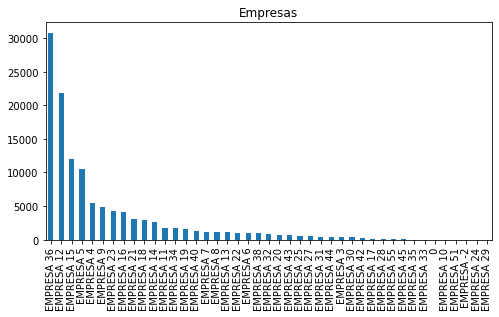

In [26]:
plt.figure(figsize=(8, 4))
plt.title('Empresas')
df['empresa'].value_counts().plot.bar();

Como temos uma lista grande de empresas (43), vamos observar apenas as 7 mais frequentes e saber quanto representam do total:

In [169]:
#Construindo um dataframe com os percentuais e cumulativos:
pareto_df = pd.DataFrame(data=df['empresa'].value_counts())
pareto_df = pareto_df.sort_values(by='empresa',ascending=False)
pareto_df["perc"] = pareto_df["empresa"]/pareto_df["empresa"].sum()*100
pareto_df["cumulativo"] = pareto_df["empresa"].cumsum()/pareto_df["empresa"].sum()*100

In [221]:
#Verificando o dataframe:
pareto_df.head(8)

,empresa,perc,cumulativo
EMPRESA 36,30821,25.388810,25.388810
EMPRESA 12,21769,17.932222,43.321032
EMPRESA 15,12018,9.899832,53.220864
EMPRESA 5,10590,8.723516,61.944380
EMPRESA 4,5493,4.524861,66.469241
EMPRESA 9,4904,4.039672,70.508913
EMPRESA 23,4313,3.552835,74.061748
EMPRESA 16,4106,3.382319,77.444067


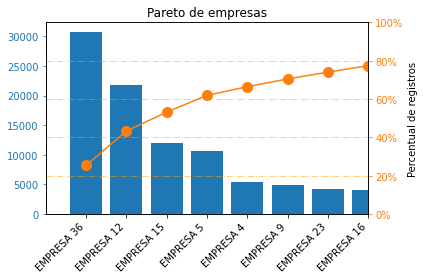


Mais de 50% dos registros foram gerados por 3 empresas e quase 80% de todos os registros foram gerados por 8 empresas.
Importante notar que essas 8 empresas são aproximademente apenas 18% do número total de empresas com registros gerados.
O comportamento se assemelha ao de uma distribuição de Pareto.
A EMPRESA 36 tem quase 25% de todos os registros gerados no sistema.



In [224]:
#Construindo o diagrama de Pareto para a quantidade de empresas:

#Criando o espaço/figura do gráfico:
fig, ax = plt.subplots()

#Criando o eixo de barplot:
ax.bar(pareto_df.index, pareto_df["empresa"], color="C0")

#Criando o eixo de lineplot com cumulativos:
ax2 = ax.twinx()
ax2.plot(pareto_df.index, pareto_df["cumulativo"], color="C1", marker="o", ms=10)
ax2.yaxis.set_major_formatter(PercentFormatter())

#Adicionar os ticks nos dois eixos y:
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

#Adicionar um grid laranja:
ax2.grid(b = True, color ='orange',
        linestyle ='-.', linewidth = 1.0,
        alpha = 0.5)

#Estabelecendo as descrições dos eixos e título do gráfico:
plt.ylabel("Percentual de registros")
plt.title("Pareto de empresas")

#Estabelecendo os limites do gráfico:
plt.xlim(-1,7)
plt.ylim(0,100)

#Rotacionar os labels de x para melhor visualização:
fig.autofmt_xdate(rotation=45)

#Mostrar o gráfico ao final:
fig.tight_layout()
plt.show()

print(f"""
Mais de 50% dos registros foram gerados por 3 empresas e quase 80% de todos os registros foram gerados por 8 empresas.
Importante notar que essas 8 empresas são aproximademente apenas {int(8/len(df['empresa'].unique())*100)}% do número total de empresas com registros gerados.
O comportamento se assemelha ao de uma distribuição de Pareto.
A EMPRESA 36 tem quase 25% de todos os registros gerados no sistema.
""")

## Clientes

Vamos identificar os principais clientes dentro das top 4 empresas vistas anteriormente (representando 60% dos tickets).

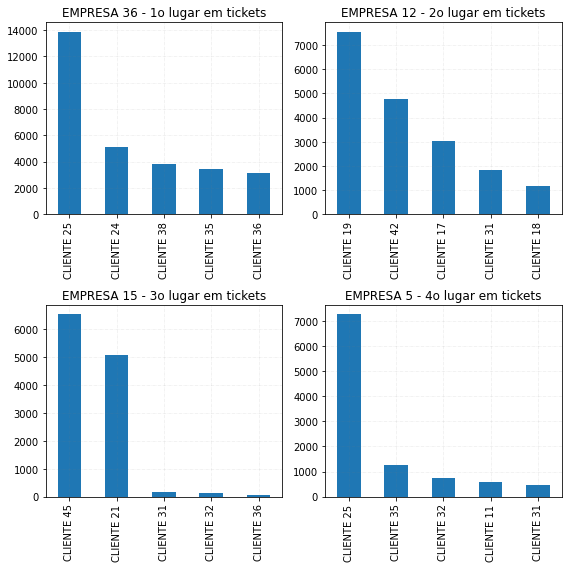

In [230]:
#Criação do gráfico onde são mostradas as empresas e respectivos clientes com mais tickets gerados.

#Criando uma estrutura 2 x 2 de figuras e eixos:
fig, axes = plt.subplots (2, 2, figsize=(8, 8))

#Definindo somente os 4 primeiros clientes de cada empresa, com a identificação da empresa.

ax1 = df[df['empresa']=='EMPRESA 36']['cliente'].value_counts().nlargest(5).plot(kind='bar', ax=axes[0,0])
ax1.title.set_text('EMPRESA 36 - 1o lugar em tickets')
ax1.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax2 = df[df['empresa']=='EMPRESA 12']['cliente'].value_counts().nlargest(5).plot(kind='bar', ax=axes[0,1])
ax2.title.set_text('EMPRESA 12 - 2o lugar em tickets')
ax2.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax3 = df[df['empresa']=='EMPRESA 15']['cliente'].value_counts().nlargest(5).plot(kind='bar', ax=axes[1,0])
ax3.title.set_text('EMPRESA 15 - 3o lugar em tickets')
ax3.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax4 = df[df['empresa']=='EMPRESA 5']['cliente'].value_counts().nlargest(5).plot(kind='bar', ax=axes[1,1])
ax4.title.set_text('EMPRESA 5 - 4o lugar em tickets')
ax4.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

#Para encaixar todos os gráficos sem overlapping:
fig.tight_layout();

In [259]:
#Calculando o número de registros referentes aos clientes com mais de 4000 registros.
top_registros = len(df[
    (df['empresa']=='EMPRESA 36') & (df['cliente']=='CLIENTE 25')
    |
    (df['empresa']=='EMPRESA 12') & ((df['cliente']=='CLIENTE 19')|df['cliente']=='CLIENTE 42')
    |
    (df['empresa']=='EMPRESA 15') & ((df['cliente']=='CLIENTE 45')|df['cliente']=='CLIENTE 21')
    |
    (df['empresa']=='EMPRESA 5') & (df['cliente']=='CLIENTE 25')
])

print(f"""
São {top_registros} registros somente em 5 clientes - equivalente a {int(top_registros/len(df)*100)}% do total de registros.
""")


São 21167 registros somente em 5 clientes - equivalente a 17% do total de registros.



Podemos tirar algumas conclusões:

1- São poucos clientes dentro das empresas que são representativos em número de tickets gerados.

- Na EMPRESA 36, o CLIENTE 25 é o principal.

- Na EMPRESA 12, a distribuição é mais uniforme.

- Na EMPRESA 15, o CLIENTE 45 e CLIENTE 21 são os únicos praticamente.

- Na EMPRESA 5, o CLIENTE 25 é o principal.


- Com exceção do principal cliente geral (CLIENTE 25) da EMPRESA 36, que possui quase 14000 tickets gerados, os principais geradores de tickets de cada empresa estão na faixa de 4000-15000 tickets para o período fornecido pelo dataset (próximo de 6 dias).

2- Notamos que há clientes com a mesma identificação porém imagina-se que sejam entidades distintas. Ou seja, o CLIENTE 25 da EMPRESA 36 possivelmente não é o mesmo CLIENTE 25 da EMPRESA 5. Talvez fosse interessante atrelar um nome único aos clientes.

Porém conseguimos identificar quais são as necessidades desses clientes em termos de *time*.

In [242]:
#df.plot(
#    x = 'empresa',
#    kind = 'barh',
#    stacked = True,
#    title = 'Stacked Bar Graph',
#    mark_right = True)

Quais são as criticidades identificadas nesses clientes?

## Tempo de resolução dos tickets

In [109]:
df['dif'] = df['encerrado'] - df['aberto']

Extraindo o número de horas da diferença:

In [110]:
df['dif_hours'] = df['dif'].astype('timedelta64[h]')

In [233]:
#Checando se as colunas novas dif e dif_hours apareceram - OK!
df.columns

Index(['número', 'empresa', 'cliente', 'grupo_designado', 'time', 'aberto',
       'encerrado', 'prioridade', 'estado', 'foi_violado', 'tipo_registro',
       'id_incidente', 'categ', 'acao', 'dif', 'dif_hours'],
      dtype='object')

Conseguimos então construir um boxplot:

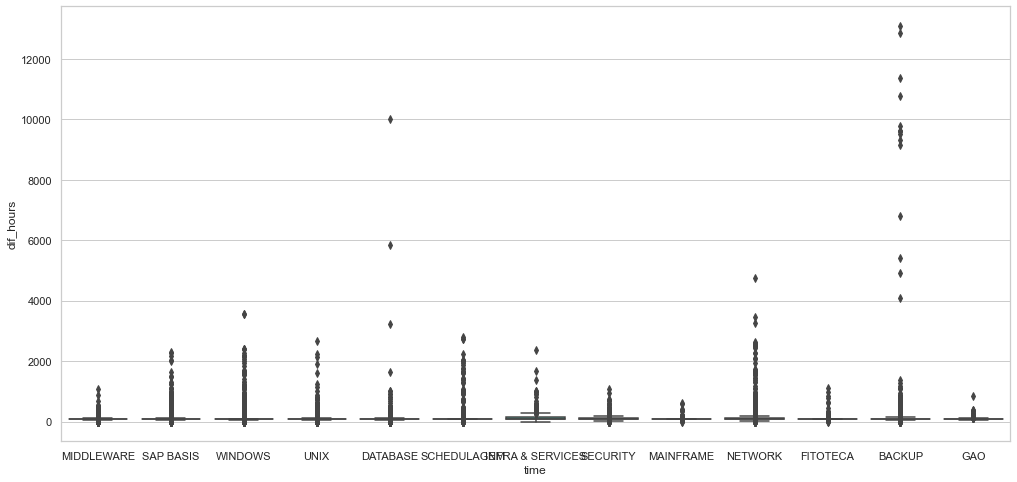

In [18]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=df["dif_hours"], x=df["time"])

Os serviços relacionados a BACKUP possuem muitos outliers. Por alguma razão esses chamados demoram muito para serem fechados.

Enquanto isso, os serviços de MAINFRAME, SECURITY, GAO e MIDDLEWARE são fechados em até 100h.

É importante ressaltar que o serviço de BACKUP consta como segundo mais realizado (somente atrás de SCHEDULAGEM), conforme contagem abaixo, e possivelmente deve estar impactando negativamente o KPI de tempo de resposta nos serviços da área respondente.

In [19]:
df['time'].value_counts()
#Graficamente:
#ax = sns.barplot(x="time", y="dif_hours", data=df, estimator=median)

SCHEDULAGEM         39003
BACKUP              23447
WINDOWS             13772
MAINFRAME           12306
NETWORK              6520
SAP BASIS            6256
UNIX                 5441
DATABASE             4883
FITOTECA             3902
MIDDLEWARE           2738
SECURITY             1971
INFRA & SERVICES      607
GAO                   550
Name: time, dtype: int64

<AxesSubplot:title={'center':'Serviços realizados'}>

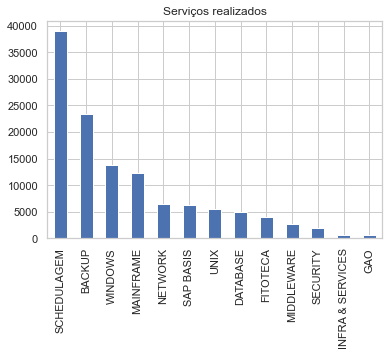

In [236]:
plt.title('Serviços realizados')
df['time'].value_counts().plot.bar()

Outra conclusão que conseguimos tirar também é sobre o tempo de fechamento das ações *dif_hours* versus *prioridade*.
- O tempo de fechamento das ações críticas está similar ou maior do que o tempo para as de menor criticidade, necessário revisar a razão.
- Existem muitos outliers.

In [237]:
df['prioridade'].value_counts()

4 - Baixo       40076
2 - Alto        29529
1 - Crítico     28399
3 - Moderado    23392
Name: prioridade, dtype: int64

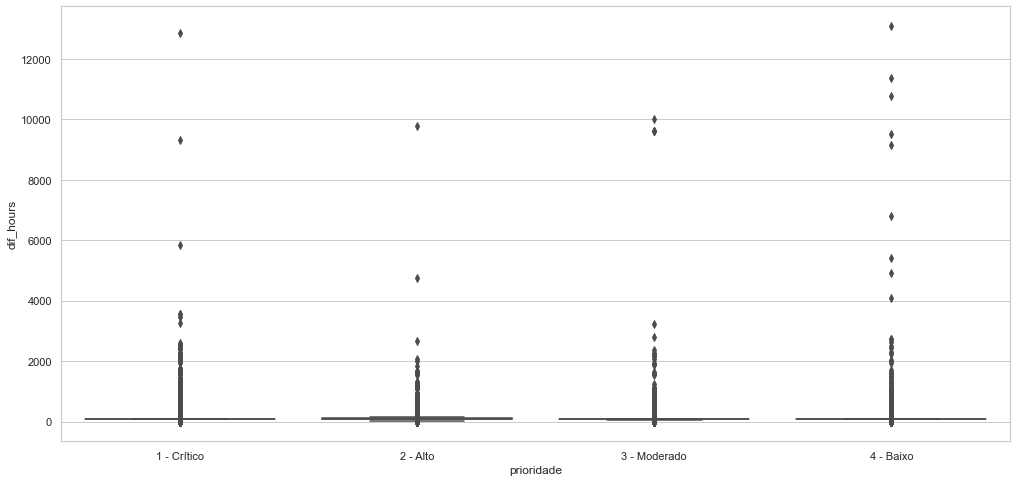

In [17]:
sns.set(rc={'figure.figsize':(17,8)})
sns.set_theme(style="whitegrid")
order_list = ['1 - Crítico', '2 - Alto', '3 - Moderado', '4 - Baixo']
ax2 = sns.boxplot(y=df["dif_hours"], x=df["prioridade"], order=order_list)

In [239]:
df['tipo_registro'].value_counts()

INCIDENTES    91397
EVENTOS       29999
Name: tipo_registro, dtype: int64

In [240]:
df[(df['dif_hours']>2000) & (df['prioridade']=='1 - Crítico')]

,número,empresa,cliente,grupo_designado,time,aberto,encerrado,prioridade,estado,foi_violado,tipo_registro,id_incidente,categ,acao,dif,dif_hours
91170,INC20207368253,EMPRESA 12,CLIENTE 25,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2020-12-21 05:24:05,2021-03-14 16:00:43,1 - Crítico,Encerrado,True,INCIDENTES,NaN,INDISPONIBILIDADE,RESET DE SERVIDOR,83 days 10:36:38,2002.0
91177,INC20207366584,EMPRESA 12,CLIENTE 25,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2020-12-20 05:24:05,2021-03-14 16:00:58,1 - Crítico,Encerrado,True,INCIDENTES,NaN,INDISPONIBILIDADE,RESET DE SERVICO,84 days 10:36:53,2026.0
91188,INC20207364533,EMPRESA 12,CLIENTE 25,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2020-12-19 05:24:05,2021-03-14 16:00:56,1 - Crítico,Encerrado,True,INCIDENTES,NaN,INDISPONIBILIDADE,LIMPEZA DE DISCO,85 days 10:36:51,2050.0
91201,INC20207360728,EMPRESA 12,CLIENTE 37,TVT - EXTENDED SUPPORT TEAM SAP BASIS,SAP BASIS,2020-12-18 05:24:05,2021-03-11 14:54:58,1 - Crítico,Cancelado,True,INCIDENTES,NaN,INDISPONIBILIDADE,RESET DE SERVICO,83 days 09:30:53,2001.0
91341,INC20207260916,EMPRESA 12,CLIENTE 35,TVT - EXTENDED SUPPORT TEAM WINDOWS,WINDOWS,2020-11-15 11:41:05,2021-02-15 04:04:24,1 - Crítico,Encerrado,False,INCIDENTES,NaN,BANCO DE DADOS,APLICACAO DE PATCH,91 days 16:23:19,2200.0
91346,INC20207245622,EMPRESA 22,CLIENTE 32,TVT - EXTENDED SUPPORT TEAM UNIX,UNIX,2020-11-10 11:27:38,2021-02-07 22:04:30,1 - Crítico,Encerrado,True,INCIDENTES,NaN,BANCO DE DADOS,RESET DE SERVIDOR,89 days 10:36:52,2146.0
91349,INC20207236283,EMPRESA 32,CLIENTE 31,TVT - NOC - SUPPORTING SERVICES,NETWORK,2020-11-06 16:43:32,2021-02-18 09:01:00,1 - Crítico,Encerrado,False,INCIDENTES,NaN,BANCO DE DADOS,APLICACAO DE PATCH,103 days 16:17:28,2488.0
91357,INC20207224695,EMPRESA 30,CLIENTE 31,TVT - NOC - SUPPORTING SERVICES,NETWORK,2020-11-03 09:41:33,2021-02-15 14:02:23,1 - Crítico,Encerrado,False,INCIDENTES,NaN,PERFORMANCE,APLICACAO DE PATCH,104 days 04:20:50,2500.0
91358,INC20207213185,EMPRESA 34,CLIENTE 35,TVT - EXTENDED SUPPORT TEAM WINDOWS,WINDOWS,2020-10-29 08:26:06,2021-01-25 17:09:22,1 - Crítico,Encerrado,False,INCIDENTES,NaN,PERFORMANCE,QUERY DB,88 days 08:43:16,2120.0
91361,INC20207195531,EMPRESA 34,CLIENTE 35,TVT - EXTENDED SUPPORT TEAM WINDOWS,WINDOWS,2020-10-23 15:30:05,2021-01-25 17:09:49,1 - Crítico,Encerrado,True,INCIDENTES,NaN,INDISPONIBILIDADE,RESET DE SERVICO,94 days 01:39:44,2257.0


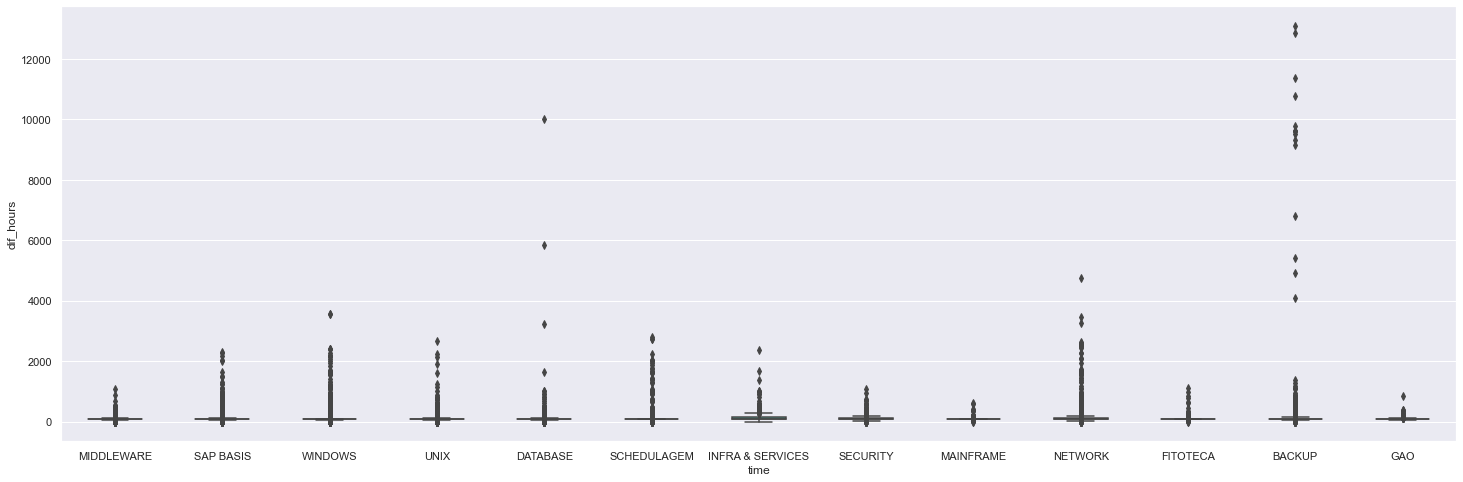

In [22]:
sns.set(rc={'figure.figsize':(25,8)})

#Definindo o boxplot por times:
sns.boxplot(y='dif_hours',
            x='time',
           data=df,
           width=0.5);

# Média por time

In [126]:
# Separar por nivel de prioridade para saber uma média por time

In [134]:
critico=df[df['prioridade']=='1 - Crítico']['dif_hours']
alto=df[df['prioridade']=='2 - Alto']['dif_hours']
moderado=df[df['prioridade']=='3 - Moderado']['dif_hours']
baixo=df[df['prioridade']=='4 - Baixo']['dif_hours']

In [48]:
for i in list(df['prioridade'].unique()):
    print("")
    print(i)
    print(df[df['prioridade']==i]['dif_hours'].describe())


1 - Crítico
count    28399.000000
mean        84.725871
std        137.331893
min          0.000000
25%         73.000000
50%         73.000000
75%         76.000000
max      12868.000000
Name: dif_hours, dtype: float64

4 - Baixo
count    40076.000000
mean        83.533786
std        145.036583
min          0.000000
25%         72.000000
50%         73.000000
75%         75.000000
max      13089.000000
Name: dif_hours, dtype: float64

2 - Alto
count    29529.000000
mean        97.469471
std         92.712041
min          0.000000
25%         73.000000
50%         77.000000
75%        104.000000
max       9786.000000
Name: dif_hours, dtype: float64

3 - Moderado
count    23392.000000
mean        87.802668
std        144.134814
min          0.000000
25%         73.000000
50%         75.000000
75%         80.000000
max      10006.000000
Name: dif_hours, dtype: float64


In [128]:
# Removing outliers

In [111]:
Q1=df['dif_hours'].quantile(0.25)
Q3=df['dif_hours'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

73.0
79.0
6.0
64.0 88.0


In [120]:
index_of_outliers_max = df[df['dif_hours'] > Upper_Whisker].index

In [115]:
index_of_outliers_min=df[df['dif_hours']< Lower_Whisker].index

In [123]:
df = df.drop(list(index_of_outliers_min)+list(index_of_outliers_max))

In [ ]:
# reseting the index

In [125]:
df.reset_index(drop=True)

,número,empresa,cliente,grupo_designado,time,aberto,encerrado,prioridade,estado,foi_violado,tipo_registro,id_incidente,categ,acao,dif,dif_hours
0,INC20210266479,EMPRESA 5,CLIENTE 25,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2021-03-18 22:20:20,2021-03-21 23:00:06,2 - Alto,Encerrado,False,INCIDENTES,NaN,OCUPACAO DE ESPACO,RESET DE SERVICO,3 days 00:39:46,72.0
1,INC20210266459,EMPRESA 36,CLIENTE 38,TVT - COMMAND CENTER PAYMENTS BUSINESS,MAINFRAME,2021-03-18 22:11:22,2021-03-21 23:01:35,2 - Alto,Encerrado,False,INCIDENTES,NaN,OCUPACAO DE ESPACO,RESET DE SERVIDOR,3 days 00:50:13,72.0
2,INC20210266455,EMPRESA 36,CLIENTE 25,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2021-03-18 22:09:05,2021-03-21 23:01:33,1 - Crítico,Encerrado,False,INCIDENTES,NaN,OCUPACAO DE ESPACO,CHAMADO NO FORNECEDOR,3 days 00:52:28,72.0
3,INC20210266451,EMPRESA 12,CLIENTE 31,TVT - NOC - SUPPORTING SERVICES,NETWORK,2021-03-18 22:05:15,2021-03-21 23:04:22,1 - Crítico,Encerrado,False,INCIDENTES,NaN,OCUPACAO DE ESPACO,LIMPEZA DE DISCO,3 days 00:59:07,72.0
4,INC20210266450,EMPRESA 36,CLIENTE 25,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2021-03-18 22:04:20,2021-03-21 23:01:27,3 - Moderado,Encerrado,False,INCIDENTES,NaN,OCUPACAO DE ESPACO,APLICACAO DE PATCH,3 days 00:57:07,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97832,60174504A95E4B11682ECC63,EMPRESA 4,CLIENTE 10,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2021-03-11 21:42:49,2021-03-15 00:01:58,3 - Moderado,Encerrado,False,EVENTOS,[],PERFORMANCE,APLICACAO DE PATCH,3 days 02:19:09,74.0
97833,6017450430B3225F0A1119C3,EMPRESA 4,CLIENTE 10,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2021-03-11 21:11:28,2021-03-15 00:04:11,3 - Moderado,Encerrado,False,EVENTOS,[],INDISPONIBILIDADE,CHAMADO NO FORNECEDOR,3 days 02:52:43,74.0
97834,6017450420D1500E8991D116,EMPRESA 4,CLIENTE 10,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2021-03-11 22:08:21,2021-03-14 23:03:14,2 - Alto,Encerrado,False,EVENTOS,[],Outros,SEM ACAO,3 days 00:54:53,72.0
97835,601745040A2B31139BC1A22E,EMPRESA 4,CLIENTE 10,TVT - PRO - PRODUCAO OPEN,SCHEDULAGEM,2021-03-11 22:27:21,2021-03-15 00:02:08,2 - Alto,Encerrado,False,EVENTOS,[],Outros,RESET DE SERVIDOR,3 days 01:34:47,73.0


/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dif_hours', ylabel='Density'>

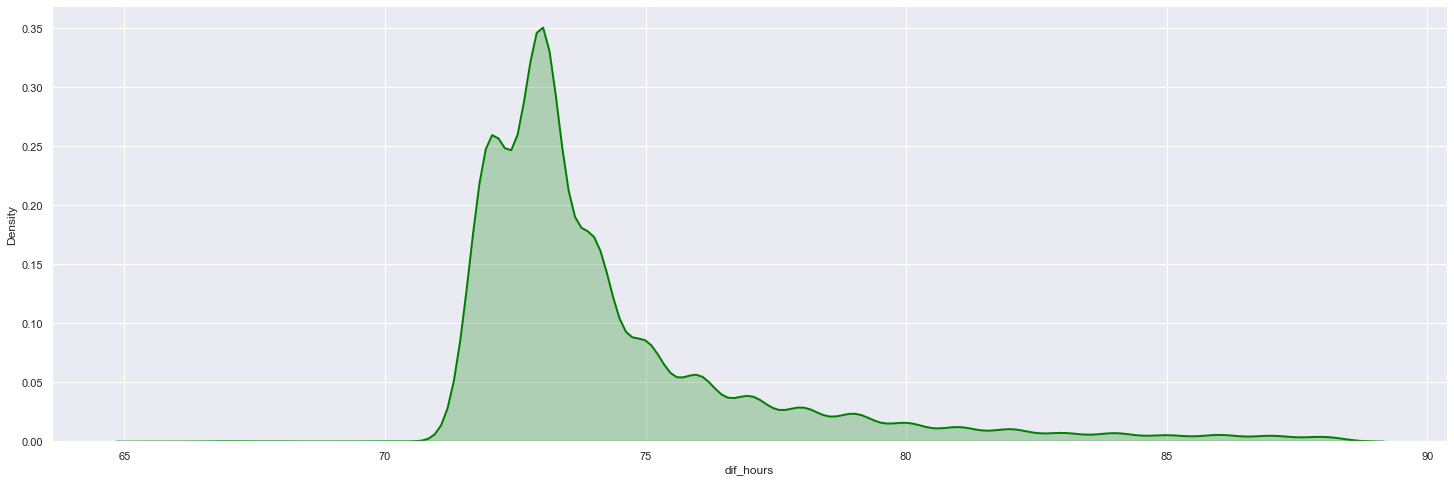

In [138]:
sns.distplot(critico, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green")

/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dif_hours', ylabel='Density'>

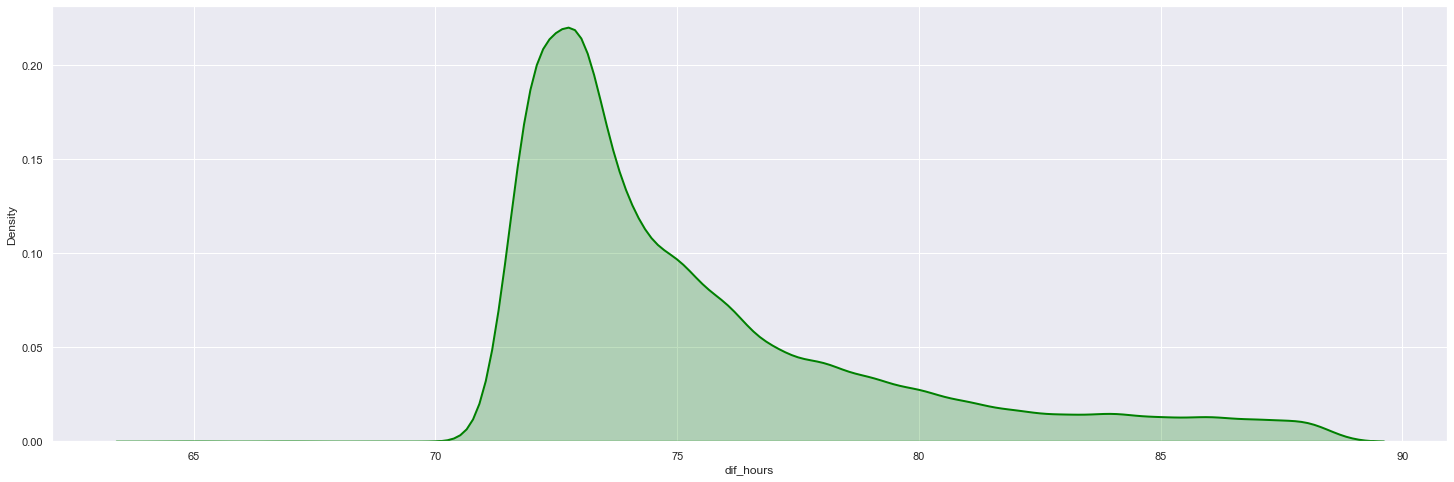

In [137]:
sns.distplot(alto, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green")

/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dif_hours', ylabel='Density'>

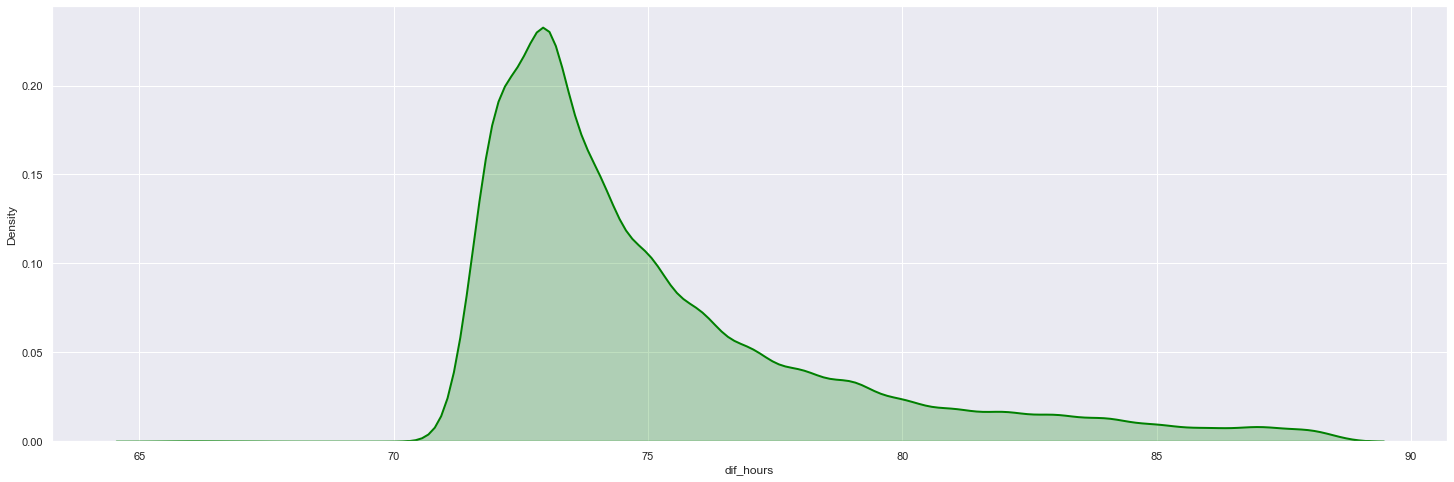

In [136]:
sns.distplot(moderado, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green")

/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dif_hours', ylabel='Density'>

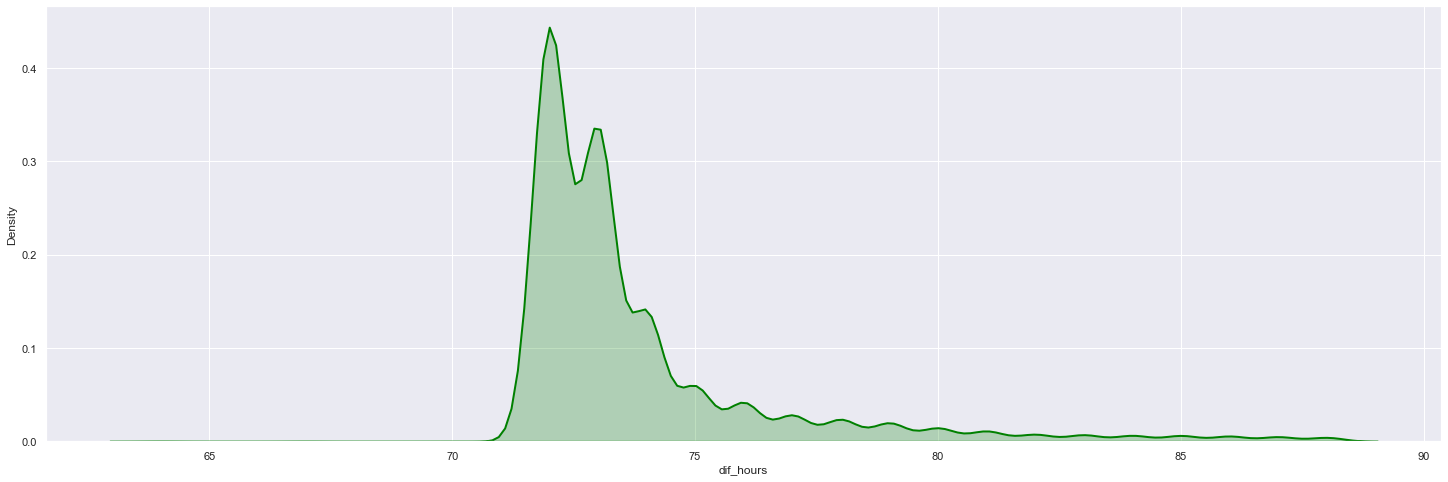

In [147]:
sns.distplot(baixo, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green")

In [148]:

# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

In [155]:
# generate univariate observations
# normality test
stat, p = shapiro(critico)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.725, p=0.000
Sample does not look Gaussian (reject H0)


In [156]:
# generate univariate observations
# normality test
stat, p = shapiro(baixo)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.654, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
# como podemos comprovar as distribuicoes nao sao normais

In [157]:
# passing into a normal distribution

In [ ]:
import numpy as np
from scipy import stats
  
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/usuario/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

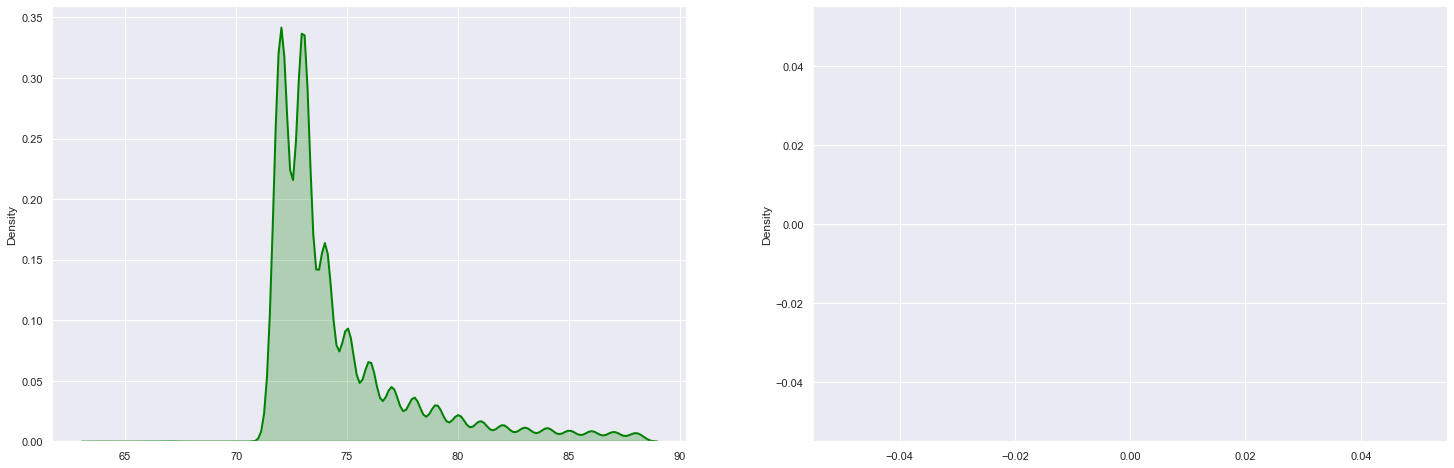

In [169]:
#generate non-normal data (exponential)
original_data = list(df.dif_hours)
  
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

# Média de tempo por criticidade

In [176]:
#Definindo a partir de quais condições estamos extraindo as amostras:
amostra_1 = df[df['prioridade']=='1 - Crítico']['dif_hours']
amostra_2 = df[df['prioridade']=='4 - Baixo']['dif_hours']

#Identificando quantas observações tem em cada amostra:
amostra_1.shape, amostra_2.shape
amostra_2 = amostra_2.sample(24577,random_state=42).reset_index(drop=True)
amostra_1.shape, amostra_2.shape

((24577,), (24577,))

In [ ]:
from scipy.stats import mannwhitneyu
mannwhitneyu(amostra_1, amostra_2)

In [ ]:
# H0 era: as médias sao iguais
# rejeitamos h0 portanto as médias nao sao iguais


In [183]:
from scipy.stats import mannwhitneyu
mannwhitneyu(amostra_1, amostra_2)

MannwhitneyuResult(statistic=253573261.0, pvalue=2.4640065766618516e-222)

In [188]:
from scipy.stats import mannwhitneyu
mannwhitneyu(amostra_1, amostra_2,alternative='greater')

MannwhitneyuResult(statistic=350455668.0, pvalue=2.4640065766618516e-222)

In [186]:
# the sample 1 is greater than the sample 2

# Média de tempo por time 

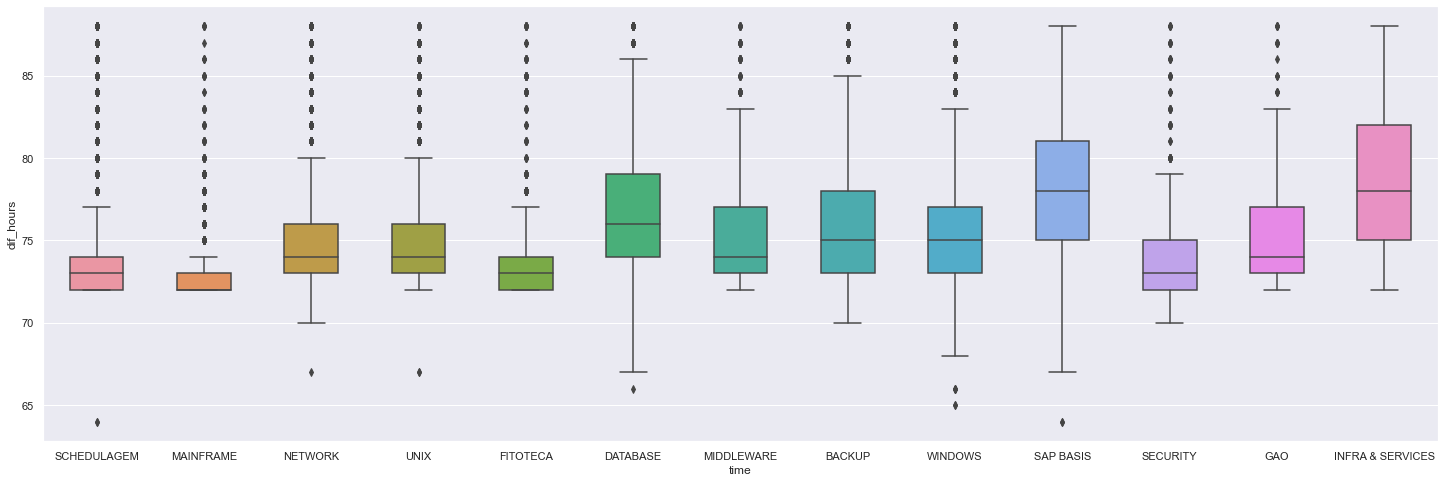

In [189]:
#Definindo o boxplot por times:
sns.boxplot(y='dif_hours',
            x='time',
           data=df,
           width=0.5);

<AxesSubplot:xlabel='time', ylabel='dif_hours'>

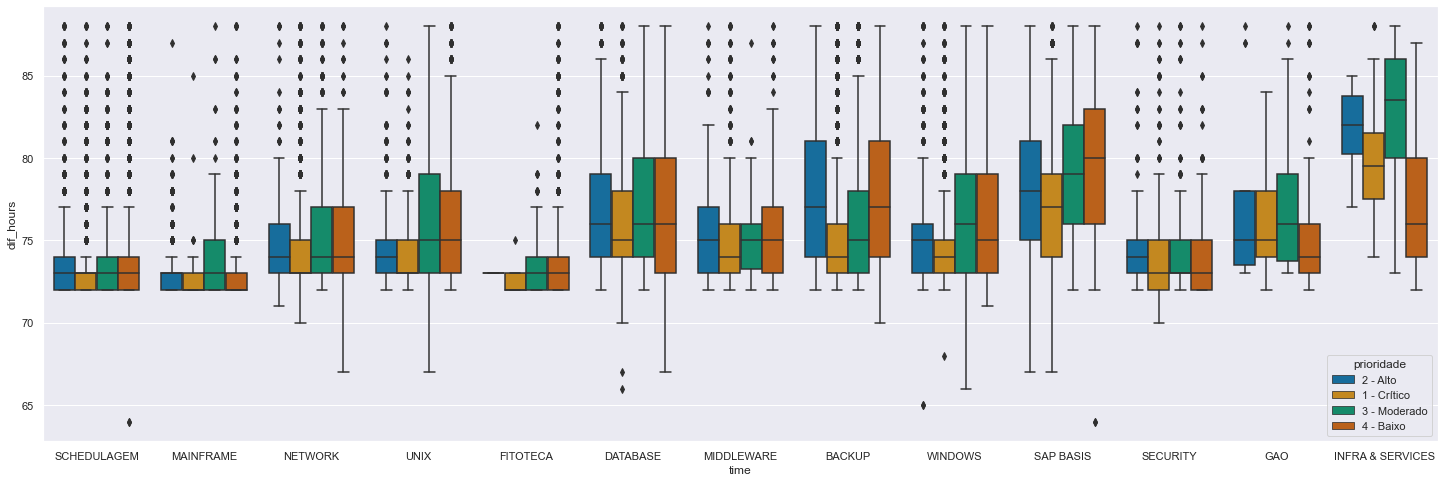

In [190]:
sns.boxplot(y='dif_hours', x='time', 
                 data=df, 
                 palette="colorblind",
                 hue='prioridade')